<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" /> 
    
    
### <font color='navy'> Modelos no lineales para pronósticos. 

**Nombres:** Axel Cabrera Jaramillo
             Christa Itzel Barrios Martinez

**Fecha:** 4 febrero 2024

**Expediente** : 730793
                 739328
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/jaramillooo/Tarea2_AECabrera

# Tarea 4: Clase 4

# Tarea 2.
Para ejemplo estudiado en esta clase data WWWUsage.csv probar lo siguiente:

Encontrar el mejor modelo ARIMA usando los criterios de AIC, BIC y log-verosimilud, justificando la estructura propuesta.
Analizar el efecto de normalizar la serie de tiempo, es decir usar MinMaxScaler para normalizar los datos. Posterior a esto, realizar el mismo precedimiento realizado en clase y encontrar el mejor modelo de ARIMA. Justifique todos los análisis realizados, incluyendo los resultados de las gráficas de ACF y PAC.

Investigar la implementación y teoría de los modelos SARIMAX. Además de eso, generar un modelo de pronóstico usando SARIMAX, donde todo el procediemiento anteriormente descrito es implementado, para el siguiente conjunto de datos con estacionalidad:
```
air2 = requests.get('https://www.stata-press.com/data/r12/air2.dta').content
data2 = pd.read_stata(BytesIO(air2))
data2.index = pd.date_range(start=datetime(data2.time[0], 1, 1), periods=len(data2), freq='MS')
```
Nota: Pueden basarse en el siguiente enlace para entender el análisis a realizar https://analyticsindiamag.com/complete-guide-to-sarimax-in-python-for-time-series-modeling/

Realizar una predicción de 20 unidades de tiempo en el futuro, tanto para el modelo ARIMA como SARIMA y reportar los resulados en una gráfica donde se puedan observar los datos reales y los datos predichos, cómo en la siguiente gráfica:
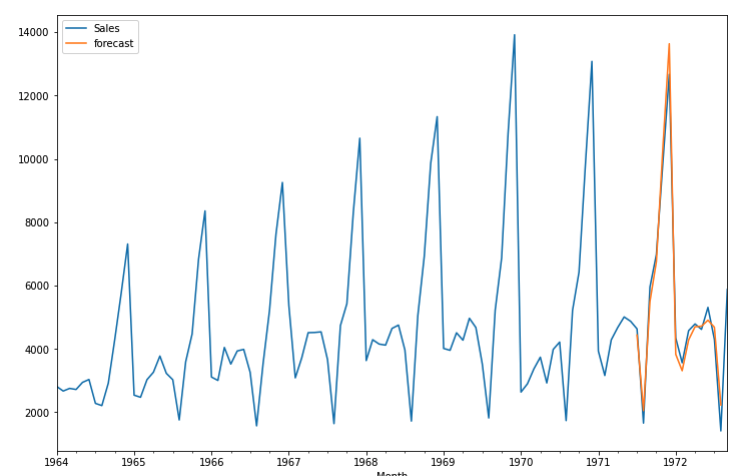

Notas adicionales
Conjunto de entrenamiento: Conjunto de ejemplos utilizados para el aprendizaje, es decir, para ajustarse a los parámetros del clasificador.

Conjunto de validación: un conjunto de ejemplos utilizados para ajustar los parámetros de un clasificador, por ejemplo, para elegir el número de unidades ocultas en una red neuronal.

Conjunto de prueba: un conjunto de ejemplos utilizados solo para evaluar el rendimiento de un clasificador completamente especificado.
https://machinelearningmastery.com/difference-test-validation-datasets/

#### Ejemplos

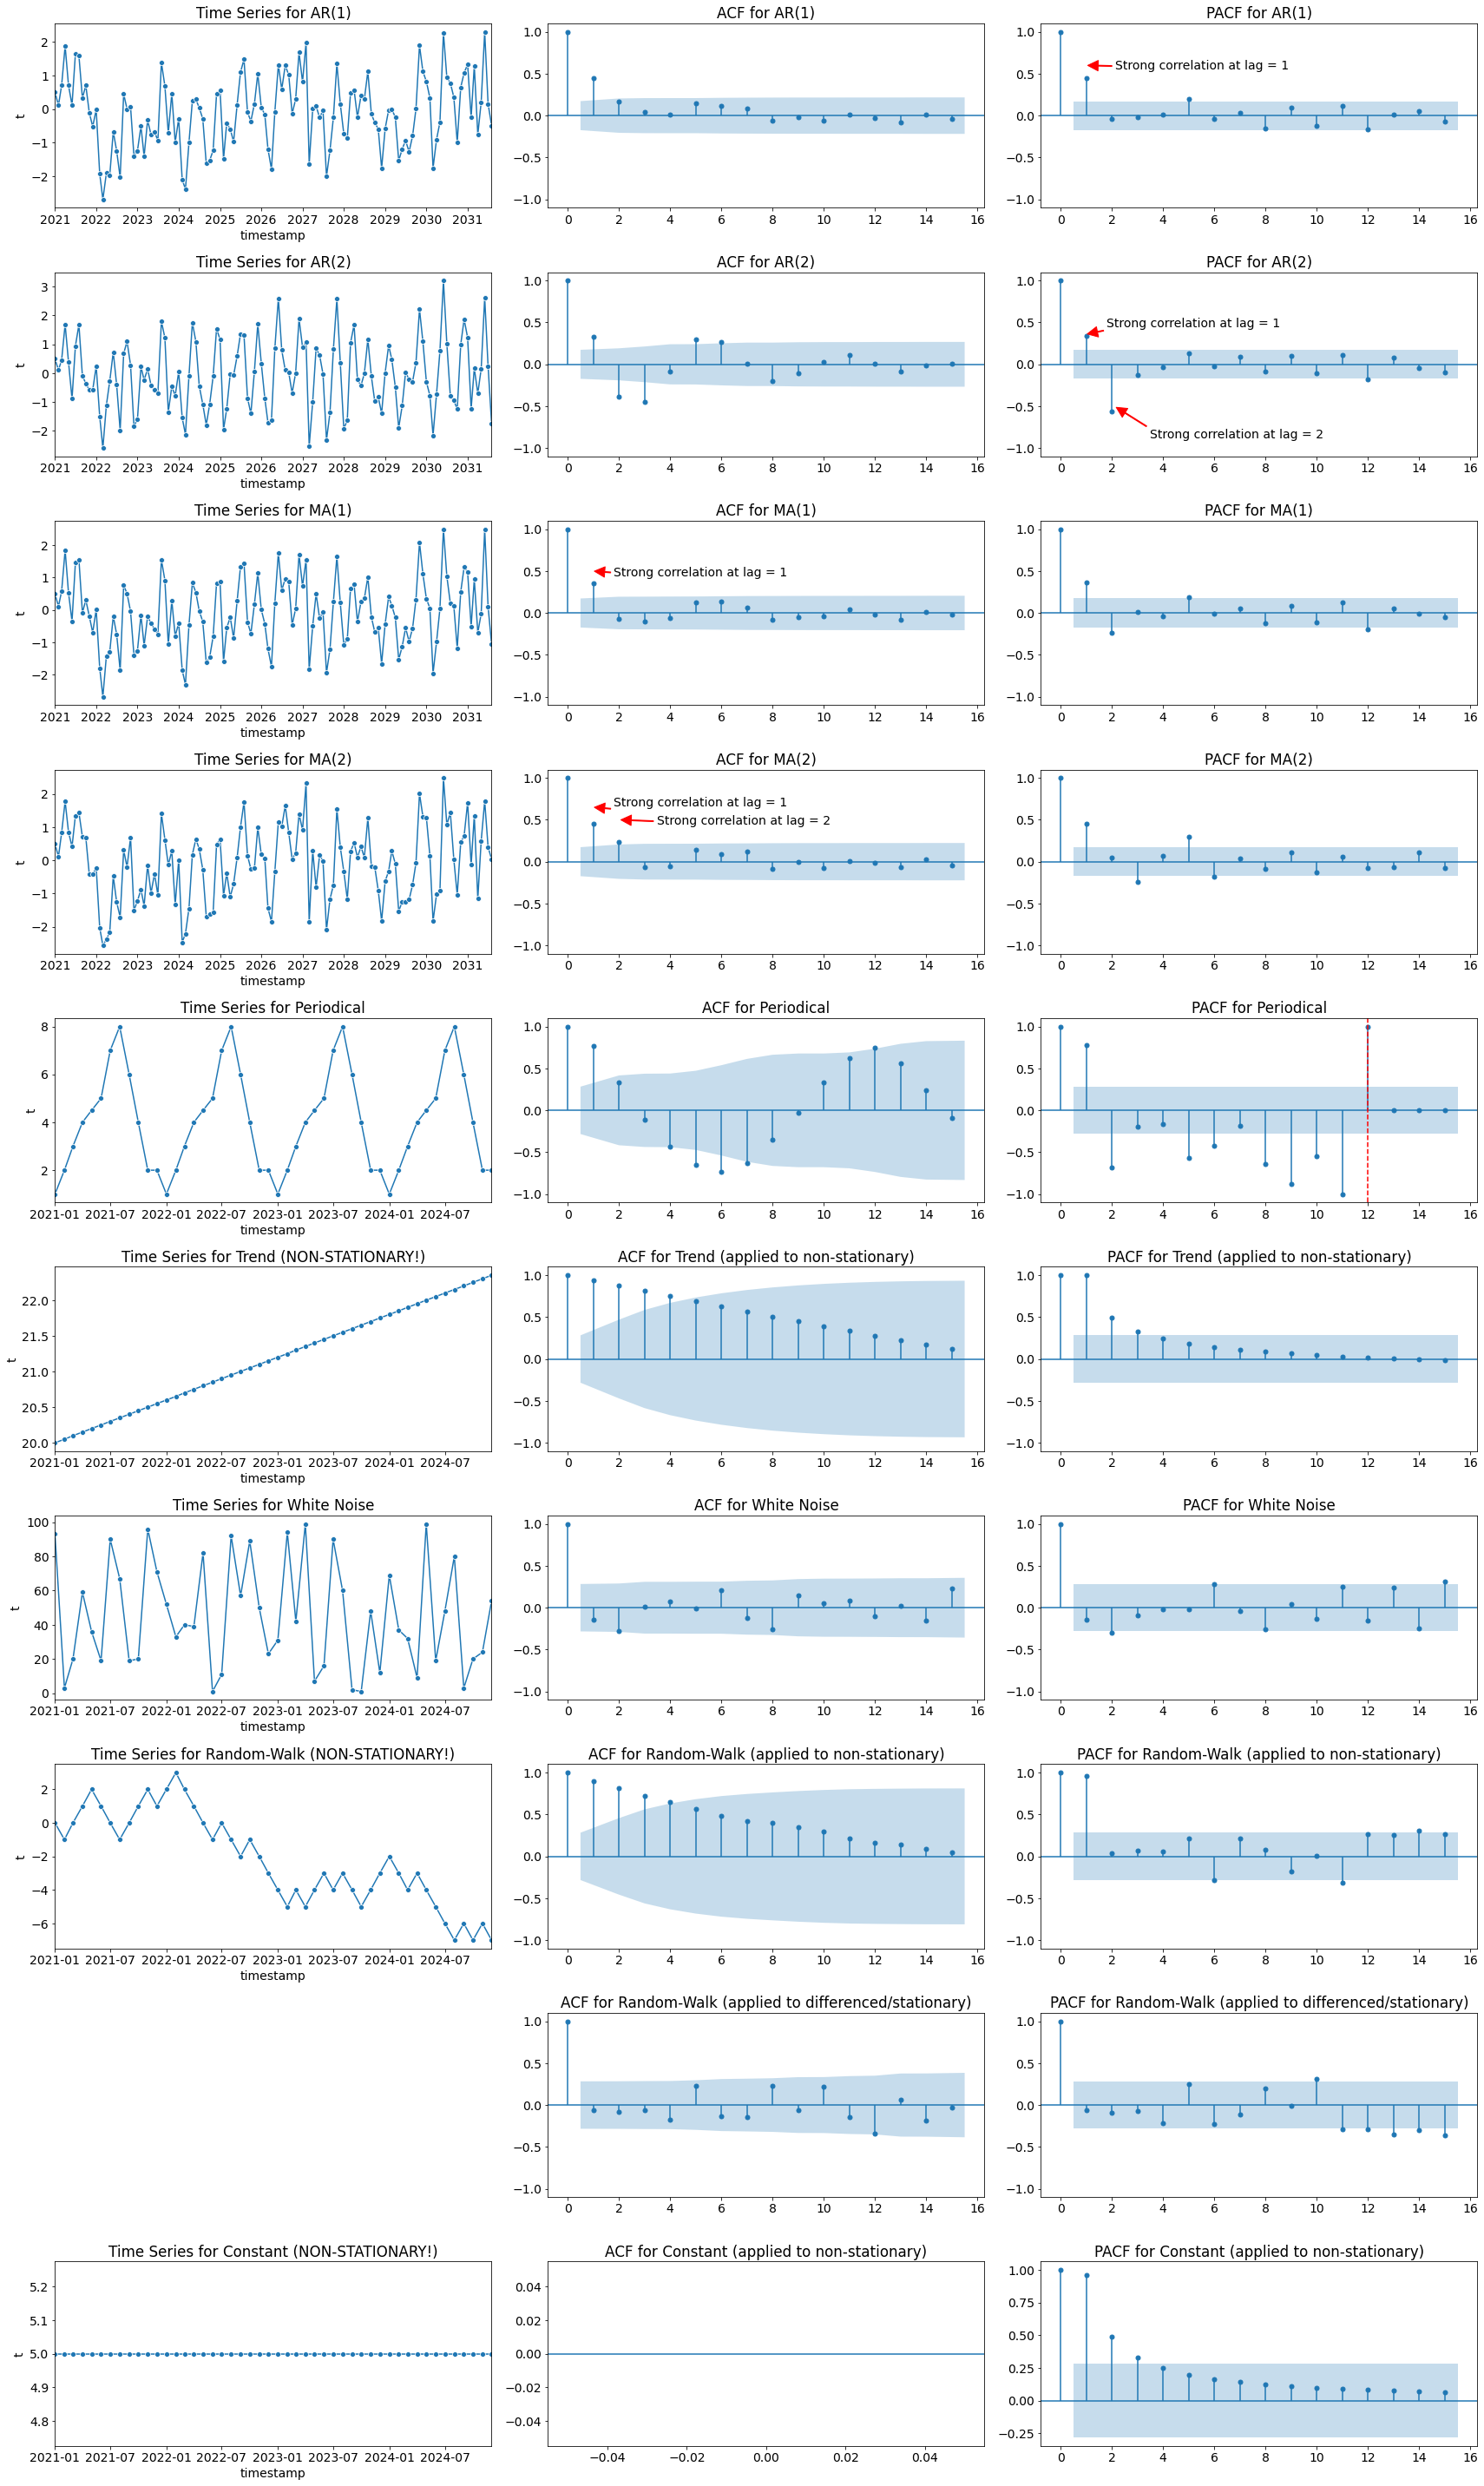

In [42]:
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from io import BytesIO
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
import requests
from datetime import datetime

# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

# plt.rc("figure", figsize=(11,8))
plt.rc("font", size=12)

In [43]:
data = pd.read_csv('WWWusage.csv', names=['values'], header=0)
data.index = data.index.droplevel()
data

,values
1,88
2,84
3,85
4,85
5,84
...,...
96,222
97,228
98,226
99,222


<Axes: >

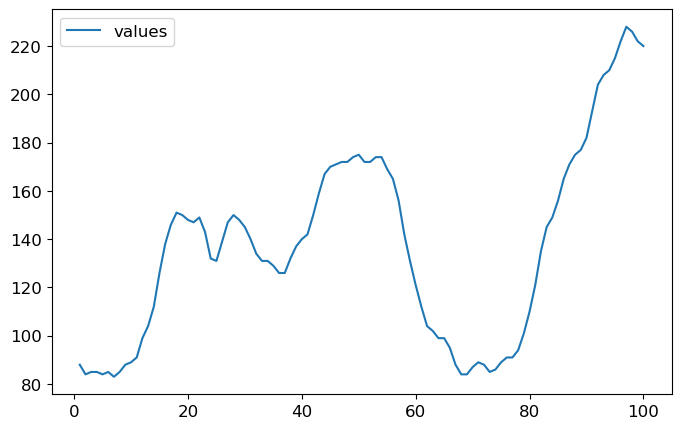

In [44]:
data.plot(figsize=(8,5))

In [45]:
# El horizonte de predicción que se desea con el modelo
HORIZONTE = 10

def split_dataset(data):
    """
    Función que se encarga de dividir la data ingresada en datos de entrenamiento y prueba.
    :param data: Data con la información de la serie de tiempo a analizar.
    """

    train_data, test_data = train_test_split(data, test_size=0.2, random_state=0, shuffle=False)

    return train_data, test_data

def evaluate_forecasts(actual, predicted):
    """
    Función que se encargará de calcular las métricas de error. (MSE, RMSE, MAD, MAPE)
    :param actual: Valor actual de la serie de tiempo que se desea predecir.
    :param predicted: Valor predecido por el modelo ajustado.
    """
    mse = mean_squared_error(actual, predicted)
    rmse = mean_squared_error(actual, predicted, squared=True)
    mad = mean_absolute_error(actual, predicted)
    mape = mean_absolute_percentage_error(actual, predicted)

    return mse, rmse, mad, mape
def model_forecast(history, data, p, d, q, start, end, horizonte=0):
    """
    Función que entrena y predice con el modelo entrenado un horizonte de tiempo HORIZONTE.
    :param history: Serie de tiempo con el cuál se entrenará el modelo. El tipo de dato tiene que estar acorde con el tipo de datos que reciba el modelo.
    """
    # Modelo de ARIMA
    arima_model = ARIMA(history, order=(p, d, q))
    model = arima_model.fit()
    print(model.summary())

    # Gráfico de los diagnósticos para los residuos
    plt.figure(figsize=(7,7))
    model.plot_diagnostics()
    plt.show()

    # Cómo realizar predicciones con el modelo ajustado
    model_func = model.predict(start=start, end=end + horizonte, dynamic=False).to_frame()
    ax = data.plot()
    model_func.plot(ax=ax)

    return model_func

def evaluate_model(model_func, train, test):
    """
    Función que se encargará de evaluar el modelo y calcular las métricas de error.
    :param model_func: Función del modelo que se encarga de entrenar y predecir un horizonte
                       de tiempo HORIZONTE.
    :param train: Datos de entrenamiento.
    :param test: Datos de prueba.
    """

## Código de solución estudiante 1

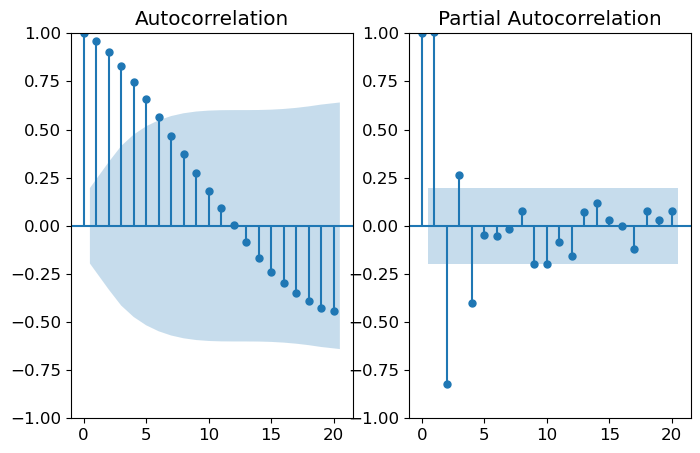

In [46]:

data_train, data_test = split_dataset(data)
# Escoger parámetros de ARIMA

# 1. Graficar ACF y PACF
f = plt.figure(figsize=(8,5))

ax1 = f.add_subplot(121)

plot_acf(data, ax=ax1)

ax2 = f.add_subplot(122)
plot_pacf(data, ax=ax2, method='ols')

plt.show()

Nos muestra que la ACF cae gradualmente y PACF se puede probar con un modelo ARIMA

In [47]:
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)
    
    if (dftest[1] <= 0.05) & (dftest[4]['5%'] > dftest[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")
adf_test(data)

Results of Dickey-Fuller Test:
Test Statistic                 -2.464240
p-value                         0.124419
#Lags Used                      3.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64
Non-stationary


#

No muestra evidencia de que sea estacionaria, por lo tanto usamos differencing

In [48]:
ilustracion = pd.DataFrame()

ilustracion['real'] = data
ilustracion['1d'] = data.diff()
ilustracion['p=2'] = data.diff(periods=2)
ilustracion['2d'] = data.diff().diff()
diff1_values = data.diff().dropna()

print('ADF para derivada primer orden...\n')
adf_test(diff1_values)

diff2_values = data.diff().diff().dropna()

print('ADF para derivada segundo orden...\n')
adf_test(diff2_values)


ADF para derivada primer orden...

Results of Dickey-Fuller Test:
Test Statistic                 -2.722238
p-value                         0.070268
#Lags Used                      2.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64
Non-stationary
ADF para derivada segundo orden...

Results of Dickey-Fuller Test:
Test Statistic                -9.929762e+00
p-value                        2.843429e-17
#Lags Used                     1.000000e+00
Number of Observations Used    9.600000e+01
Critical Value (1%)           -3.500379e+00
Critical Value (5%)           -2.892152e+00
Critical Value (10%)          -2.583100e+00
dtype: float64
Stationary


Muestra que la derivada de segundo orden si se es estacionaria.

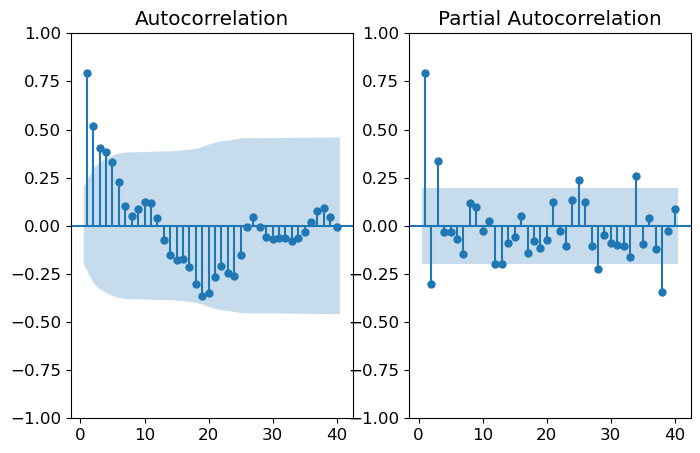

In [49]:
# 1. Graficar ACF y PACF
def plot_acf_pacf(data, kwargs=dict()):
    f = plt.figure(figsize=(8,5))

    ax1 = f.add_subplot(121)

    plot_acf(data, zero=False, ax=ax1, **kwargs)

    ax2 = f.add_subplot(122)
    plot_pacf(data, zero=False, ax=ax2, method='ols', **kwargs)

    plt.show()

plot_acf_pacf(diff1_values, {'lags':40})

Dada los valores podemos identificar p=2, d=1 y q=3, primera diferenciación.

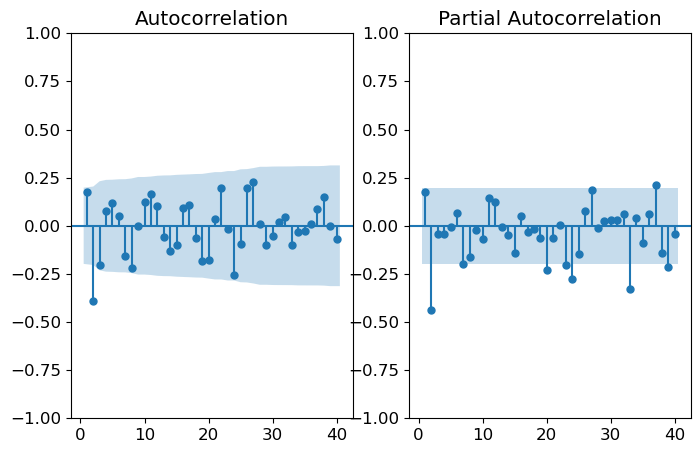

In [50]:
plot_acf_pacf(diff2_values, {'lags':40})

Para el diferenciación de orden 2 podemos identificar p=1,d=2,q=2

In [51]:
# 1. Modelo de diferencia de primer orden
am1 = ARIMA(data_train, order=(2, 1, 3))
model1 = am1.fit()
print(model1.summary())

                               SARIMAX Results                                
Dep. Variable:                 values   No. Observations:                   80
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -201.852
Date:                Tue, 06 Feb 2024   AIC                            415.705
Time:                        18:51:41   BIC                            429.922
Sample:                             0   HQIC                           421.400
                                 - 80                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4464      0.663      0.674      0.501      -0.852       1.745
ar.L2          0.2562      0.388      0.661      0.509      -0.504       1.016
ma.L1          0.6931      0.677      1.023      0.3

ar.L1 : El coeficiente es 0.4464 con un error estándar de 0.663.Es estadísticamente significativo

ar.L2 : El coeficiente es 0.2562 con un error estándar de 0.3883. Es significativo.

ma.L1 : El coeficiente es 0.6931 con un error estándar de 0.6771. No significativo

ma.L2 : El coeficiente es 0.2541 con un error estándar de 0.4690. No significativo.

ma.L3 : El coeficiente es -0.2310 con un error estándar de 0.1126. No significativo.

ljung-box: se distribuyen de manera independiente.
son heterocedásticos
se distribuyen de manera asimetrica y normalmene


<Axes: >

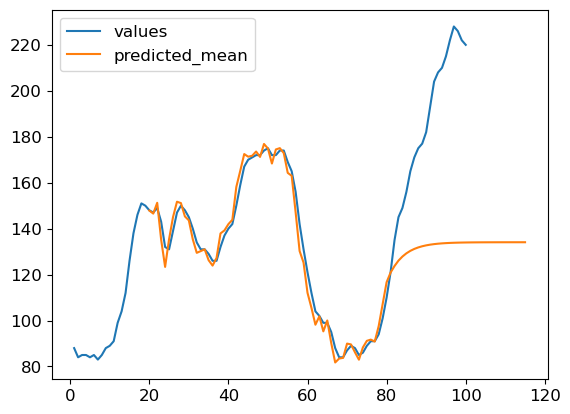

In [52]:
y_h = model1.predict(start=20, end=115, dynamic=False).to_frame()
ax = data.plot()
y_h.plot(ax=ax)

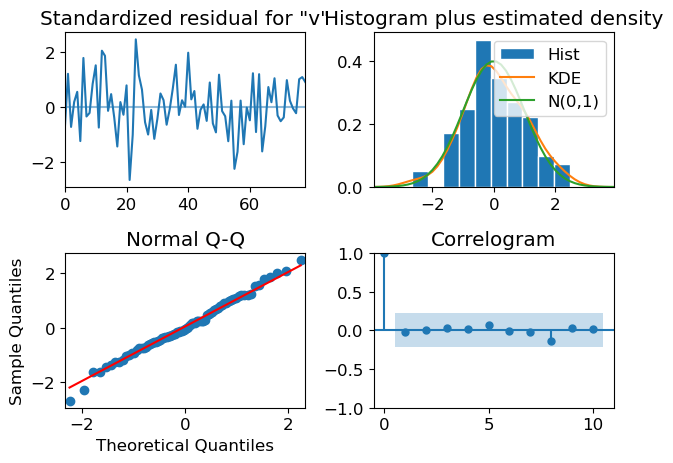

In [53]:
model1.plot_diagnostics()
plt.tight_layout();

In [54]:
# arima order 2
am1 = ARIMA(data_train, order=(1, 2, 2))
model1 = am1.fit()
print(model1.summary())

                               SARIMAX Results                                
Dep. Variable:                 values   No. Observations:                   80
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -201.756
Date:                Tue, 06 Feb 2024   AIC                            411.512
Time:                        18:51:42   BIC                            420.938
Sample:                             0   HQIC                           415.285
                                 - 80                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6478      0.113      5.720      0.000       0.426       0.870
ma.L1         -0.5207      4.948     -0.105      0.916     -10.219       9.178
ma.L2         -0.4789      2.344     -0.204      0.8


AIC ,BIC, HQIC : se ajustan en su mayoría bien a los datos con 80 observaciones.

Coeficientes: tienen significancia

Ljung-Box: residuos no están correlacionados

Prob(Q): residuos no están correlacionados

Jarque-Bera : distribución normal

parece ajustarse bien a los datos, con coeficientes significativos y residuos no correlacionados

In [55]:
# normalizados
mms = MinMaxScaler()
mms.fit(data)
normalizados = mms.transform(data)
normalizados = pd.DataFrame(normalizados, columns=["data"])
normalizados

,data
0,0.034483
1,0.006897
2,0.013793
3,0.013793
4,0.006897
...,...
95,0.958621
96,1.000000
97,0.986207
98,0.958621


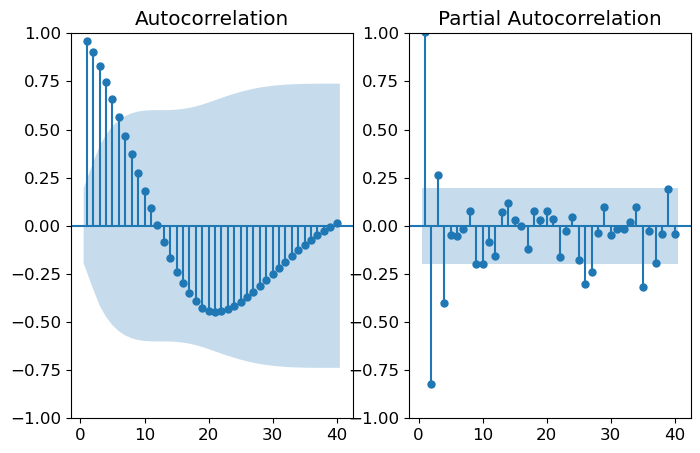

In [56]:
# Escoger parámetros de ARIMA
data_train, data_test = split_dataset(normalizados)
# 1. Graficar ACF y PACF normalizados
plot_acf_pacf(normalizados, {'lags':40})


se puede observar que los datos tienden a tener una frecuencia de relación en la que decrecen 

In [57]:
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)
    
    if (dftest[1] <= 0.05) & (dftest[4]['5%'] > dftest[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

adf_test(normalizados)

Results of Dickey-Fuller Test:
Test Statistic                 -2.464240
p-value                         0.124419
#Lags Used                      3.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64
Non-stationary


In [58]:
ilustracion = pd.DataFrame()

ilustracion['real'] = normalizados
ilustracion['1d'] = normalizados.diff()
ilustracion['p=2'] = normalizados.diff(periods=2)
ilustracion['2d'] = normalizados.diff().diff()
diff1_values = normalizados.diff().dropna()

print('ADF para derivada primer orden...\n')
adf_test(diff1_values)

diff2_values = data.diff().diff().dropna()

print('ADF para derivada segundo orden...\n')
adf_test(diff2_values)


ADF para derivada primer orden...

Results of Dickey-Fuller Test:
Test Statistic                 -2.722238
p-value                         0.070268
#Lags Used                      2.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64
Non-stationary
ADF para derivada segundo orden...

Results of Dickey-Fuller Test:
Test Statistic                -9.929762e+00
p-value                        2.843429e-17
#Lags Used                     1.000000e+00
Number of Observations Used    9.600000e+01
Critical Value (1%)           -3.500379e+00
Critical Value (5%)           -2.892152e+00
Critical Value (10%)          -2.583100e+00
dtype: float64
Stationary


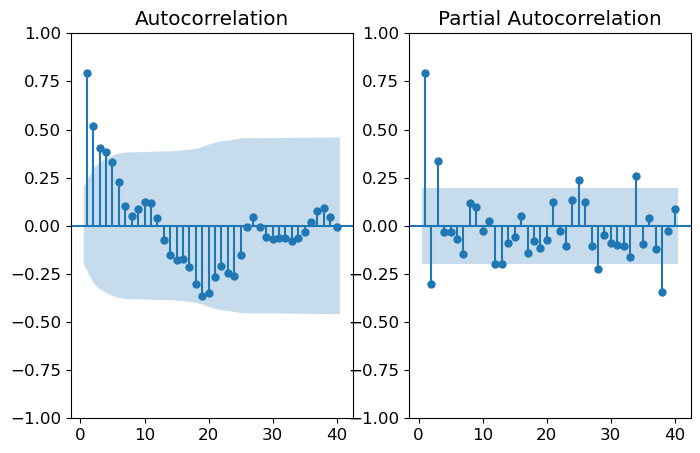

In [59]:
# 1. Graficar ACF y PACF
def plot_acf_pacf(data, kwargs=dict()):
    f = plt.figure(figsize=(8,5))

    ax1 = f.add_subplot(121)

    plot_acf(data, zero=False, ax=ax1, **kwargs)

    ax2 = f.add_subplot(122)
    plot_pacf(data, zero=False, ax=ax2, method='ols', **kwargs)

    plt.show()

plot_acf_pacf(diff1_values, {'lags':40})

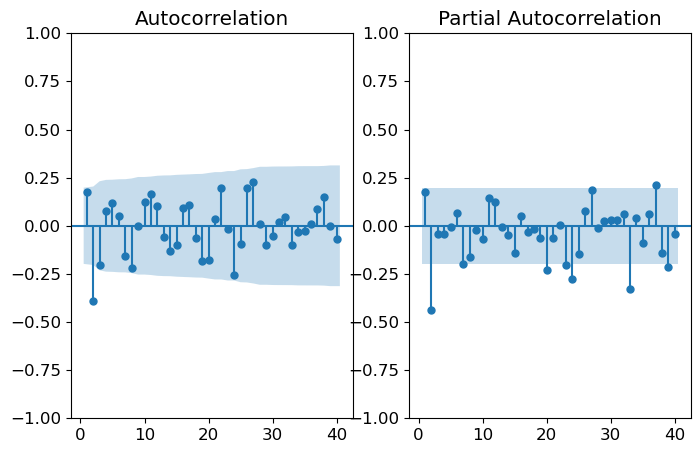

In [60]:
plot_acf_pacf(diff2_values, {'lags':40})

In [61]:
# 1. Modelo de diferencia de primer orden
am1 = ARIMA(data_train, order=(1, 1, 3))
model1 = am1.fit()
print(model1.summary())

                               SARIMAX Results                                
Dep. Variable:                   data   No. Observations:                   80
Model:                 ARIMA(1, 1, 3)   Log Likelihood                 190.975
Date:                Tue, 06 Feb 2024   AIC                           -371.950
Time:                        18:51:42   BIC                           -360.103
Sample:                             0   HQIC                          -367.204
                                 - 80                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7973      0.232      3.432      0.001       0.342       1.253
ma.L1          0.3385      0.267      1.267      0.205      -0.185       0.862
ma.L2         -0.2187      0.305     -0.717      0.4

In [62]:
# 1. Modelo de diferencia de segundo orden
am2 = ARIMA(data_train, order=(1, 2, 3))
model2 = am1.fit()
print(model1.summary())

                               SARIMAX Results                                
Dep. Variable:                   data   No. Observations:                   80
Model:                 ARIMA(1, 1, 3)   Log Likelihood                 190.975
Date:                Tue, 06 Feb 2024   AIC                           -371.950
Time:                        18:51:42   BIC                           -360.103
Sample:                             0   HQIC                          -367.204
                                 - 80                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7973      0.232      3.432      0.001       0.342       1.253
ma.L1          0.3385      0.267      1.267      0.205      -0.185       0.862
ma.L2         -0.2187      0.305     -0.717      0.4

<Axes: >

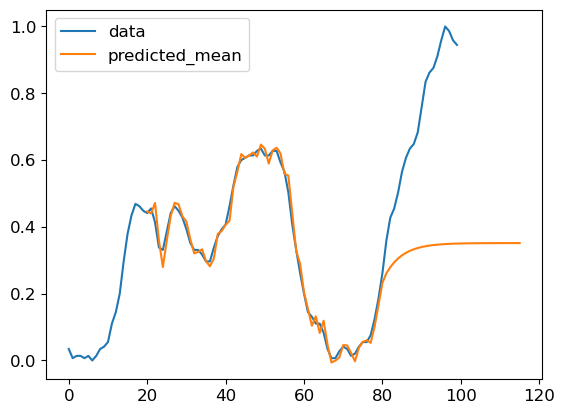

In [63]:
y_h = model2.predict(start=20, end=115, dynamic=False).to_frame()
ax = normalizados.plot()
y_h.plot(ax=ax)

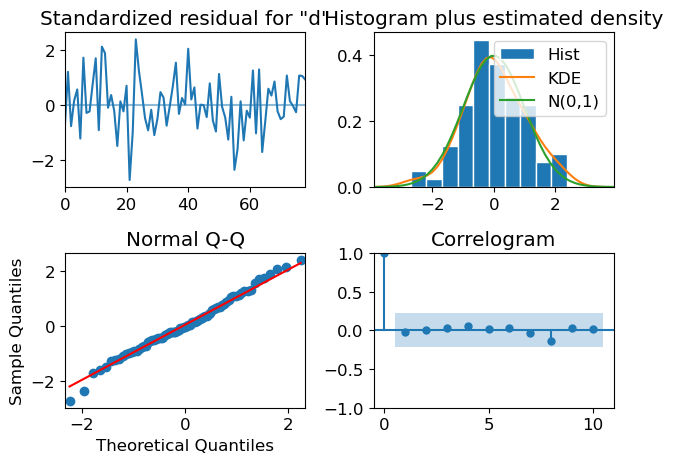

In [64]:
model2.plot_diagnostics()
plt.tight_layout();

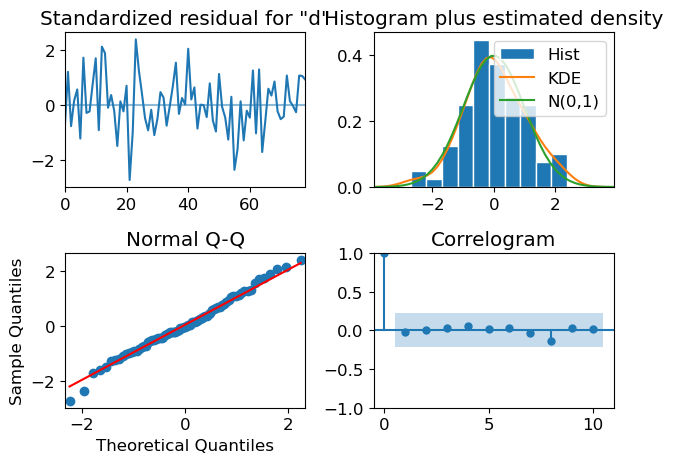

In [65]:
model2.plot_diagnostics()
plt.tight_layout();

### parte 2

In [159]:
air2 = requests.get("https://www.stata-press.com/data/r12/air2.dta").content 
data2 = pd.read_stata(BytesIO(air2)) 
data2

,air,time,t
0,112,1949.000000,1.0
1,118,1949.083374,2.0
2,132,1949.166626,3.0
3,129,1949.250000,4.0
4,121,1949.333374,5.0
...,...,...,...
139,606,1960.583374,140.0
140,508,1960.666626,141.0
141,461,1960.750000,142.0
142,390,1960.833374,143.0


In [160]:
data2['time'] = pd.to_datetime(data2['time'])
data2.index = pd.date_range(start=datetime(data2['time'][0].year, 1, 1), periods=len(data2), freq='MS')


In [161]:
dff = data2.drop(columns=["time","t"])

In [162]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Axes: >

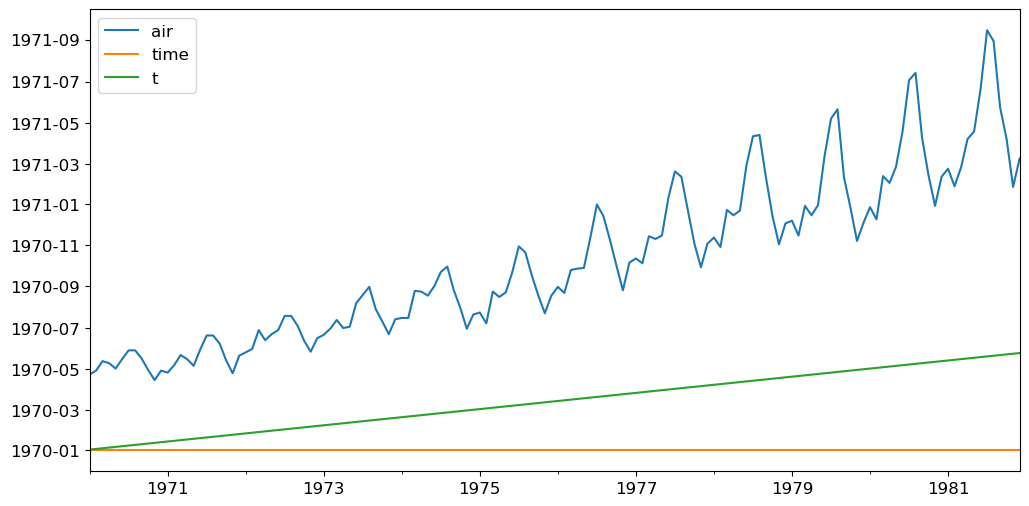

In [163]:
data2.plot(figsize=(12,6))

In [164]:
data2 = data2.drop(columns=["time", "t"])
data2

,air
1970-01-01,112
1970-02-01,118
1970-03-01,132
1970-04-01,129
1970-05-01,121
...,...
1981-08-01,606
1981-09-01,508
1981-10-01,461
1981-11-01,390


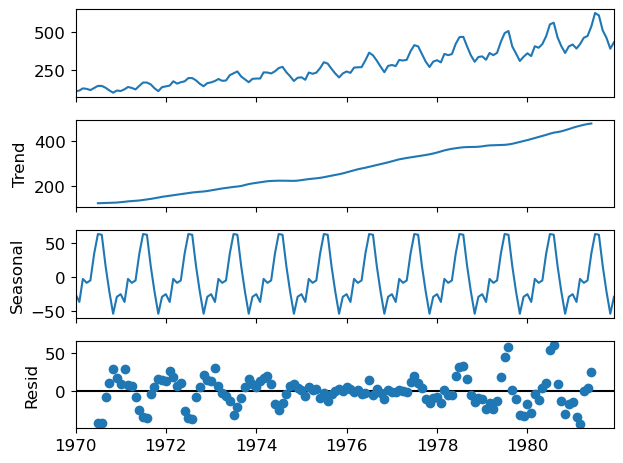

In [165]:

decompose_data = seasonal_decompose(data2, model="additive", period=12)
decompose_data.plot();
plt.show()

<Axes: >

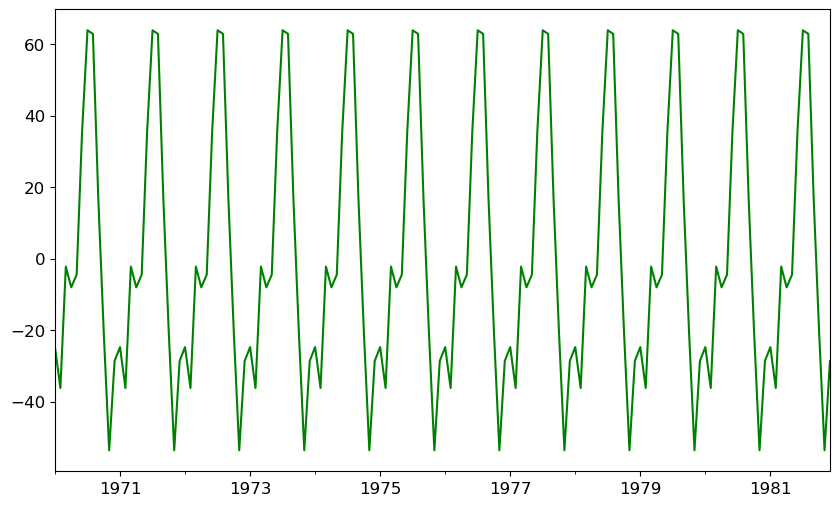

In [166]:
seasonality=decompose_data.seasonal
seasonality.plot(color='green',figsize=(10,6))

Tiene estacionalidad

In [167]:
adf_test(data2)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64
Non-stationary


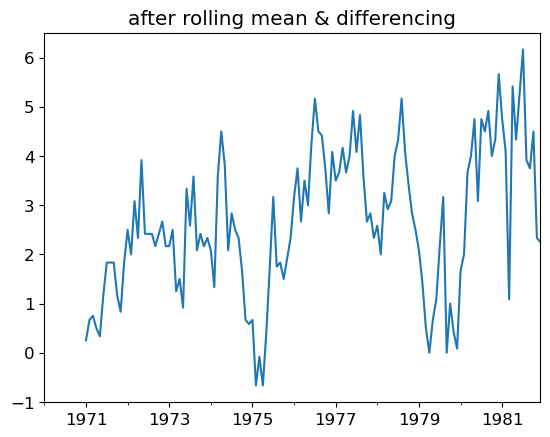

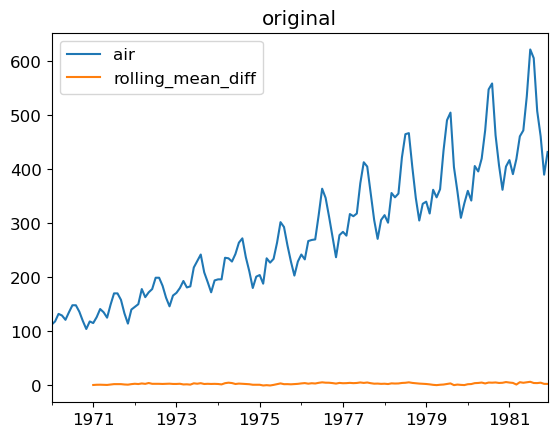

In [168]:
rolling_mean = data2.rolling(window = 12).mean()
data2['rolling_mean_diff'] = rolling_mean - rolling_mean.shift()
ax1 = plt.subplot()
data2['rolling_mean_diff'].plot(title='after rolling mean & differencing');
ax2 = plt.subplot()
data2.plot(title='original');

In [174]:
# adf test, sin nans
tad, ted = split_dataset(data2)
adf_test(data2["rolling_mean_diff"].dropna())

Results of Dickey-Fuller Test:
Test Statistic                  -3.383021
p-value                          0.011551
#Lags Used                       1.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64
Stationary


In [157]:
dftest = adfuller(data2['rolling_mean_diff'].dropna(), autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
  print("\t",key, ": ", val)

1. ADF :  -3.383020726492479
2. P-Value :  0.011551493085515039
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 130
5. Critical Values :
	 1% :  -3.4816817173418295
	 5% :  -2.8840418343195267
	 10% :  -2.578770059171598


## Código de solución estudiante 2

In [74]:
data_train, data_test = split_dataset(data)

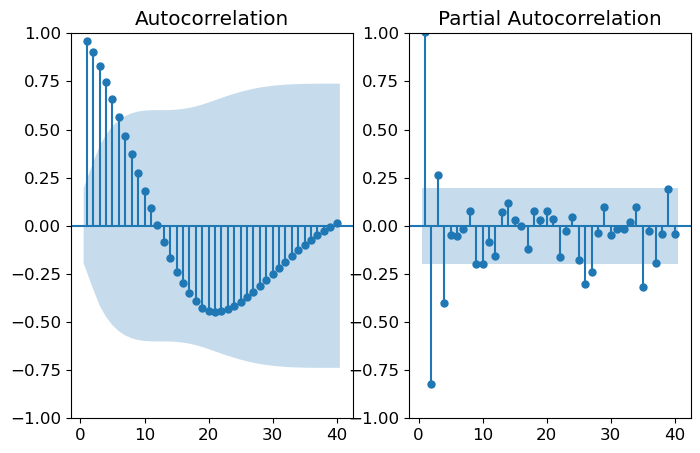

In [75]:
# 1. Graficar ACF y PACF

# No hay AR ni AM

def plot_acf_pacf(data, kwargs=dict()):
    f = plt.figure(figsize=(8,5))

    ax1 = f.add_subplot(121)

    plot_acf(data, zero=False, ax=ax1, **kwargs)

    ax2 = f.add_subplot(122)
    plot_pacf(data, zero=False, ax=ax2, method='ols', **kwargs)

    plt.show()

plot_acf_pacf(data, {'lags':40})

In [76]:
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)
    
    if (dftest[1] <= 0.05) & (dftest[4]['5%'] > dftest[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

adf_test(data)

Results of Dickey-Fuller Test:
Test Statistic                 -2.464240
p-value                         0.124419
#Lags Used                      3.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64
Non-stationary


In [77]:
# Diferenciamos la serie
ilustracion = pd.DataFrame()

ilustracion['real'] = data
ilustracion['1d'] = data.diff()
ilustracion['p=2'] = data.diff(periods=2)
ilustracion['2d'] = data.diff().diff()

ilustracion

,real,1d,p=2,2d
1,88,NaN,NaN,NaN
2,84,-4.0,NaN,NaN
3,85,1.0,-3.0,5.0
4,85,0.0,1.0,-1.0
5,84,-1.0,-1.0,-1.0
...,...,...,...,...
96,222,7.0,12.0,2.0
97,228,6.0,13.0,-1.0
98,226,-2.0,4.0,-8.0
99,222,-4.0,-6.0,-2.0


In [78]:
diff1_values = data.diff().dropna()

print('ADF para derivada primer orden...\n')
adf_test(diff1_values)

diff2_values = data.diff().diff().dropna()

print('ADF para derivada segundo orden...\n')
adf_test(diff2_values)

ADF para derivada primer orden...

Results of Dickey-Fuller Test:
Test Statistic                 -2.722238
p-value                         0.070268
#Lags Used                      2.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64
Non-stationary
ADF para derivada segundo orden...

Results of Dickey-Fuller Test:
Test Statistic                -9.929762e+00
p-value                        2.843429e-17
#Lags Used                     1.000000e+00
Number of Observations Used    9.600000e+01
Critical Value (1%)           -3.500379e+00
Critical Value (5%)           -2.892152e+00
Critical Value (10%)          -2.583100e+00
dtype: float64
Stationary


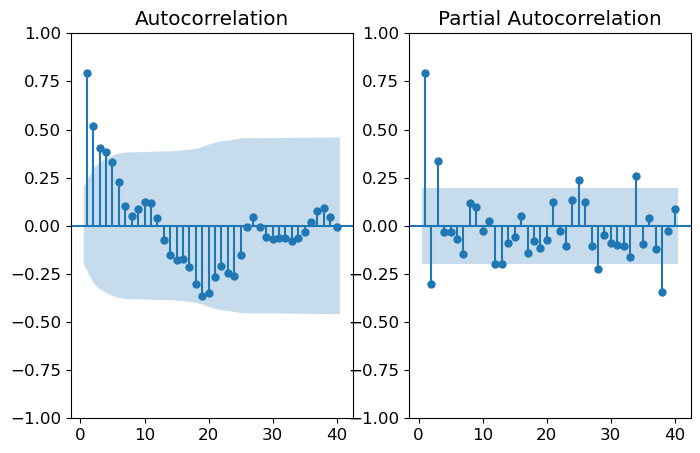

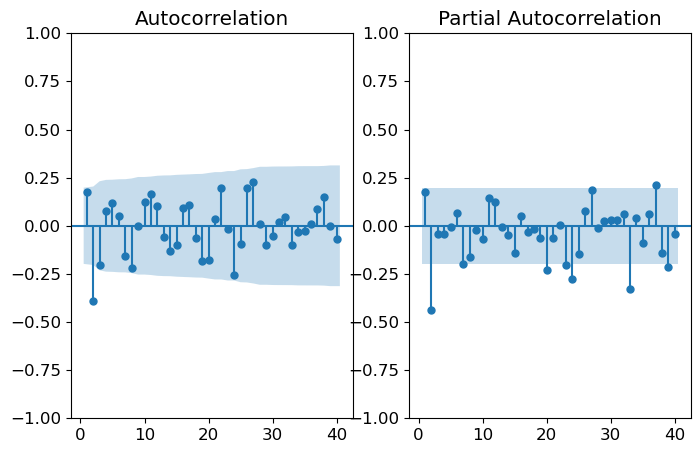

In [79]:
# 1. Graficar ACF y PACF
def plot_acf_pacf(data, kwargs=dict()):
    f = plt.figure(figsize=(8,5))

    ax1 = f.add_subplot(121)

    plot_acf(data, zero=False, ax=ax1, **kwargs)

    ax2 = f.add_subplot(122)
    plot_pacf(data, zero=False, ax=ax2, method='ols', **kwargs)

    plt.show()

plot_acf_pacf(diff1_values, {'lags':40})

plot_acf_pacf(diff2_values, {'lags':40})


**Los posibles valores de *p,d* y *q* con diferenciación 1 son (3,1,2)**
**Los posibles valores de *p,d* y *q* con diferenciación 2 son (2,2,2)**

In [80]:
# 1. Modelo de diferencia de primer orden
arima_model1 = ARIMA(data_train, order=(3, 1, 2))
model1 = arima_model1.fit()
print(model1.summary())

                               SARIMAX Results                                
Dep. Variable:                 values   No. Observations:                   80
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -201.589
Date:                Tue, 06 Feb 2024   AIC                            415.178
Time:                        18:51:45   BIC                            429.394
Sample:                             0   HQIC                           420.873
                                 - 80                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1445      0.227     -0.636      0.525      -0.590       0.301
ar.L2          0.1469      0.227      0.648      0.517      -0.297       0.591
ar.L3          0.3064      0.189      1.621      0.1

<Axes: >

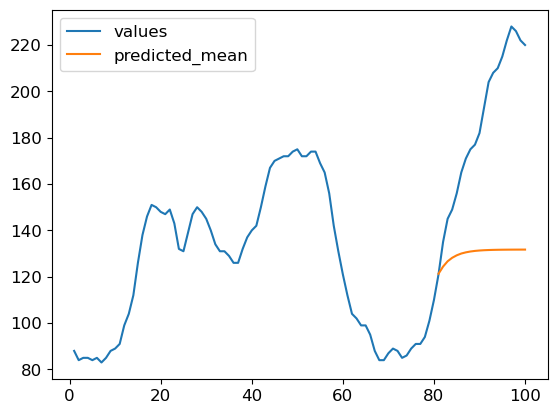

In [81]:
pred = model1.predict(start=81, end=100, dynamic=False).to_frame()

ax = data.plot()

pred.plot(ax=ax)

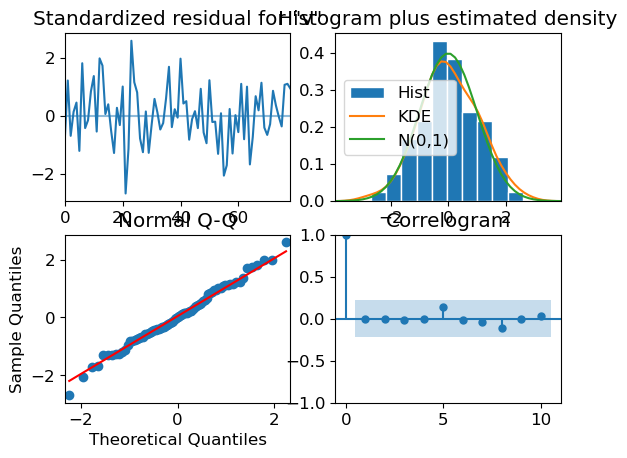

In [82]:
# Gráfico de los diagnósticos para los residuos
model1.plot_diagnostics();

In [83]:
mse, rmse, mad, mape = evaluate_forecasts(data_test, pred)
results = pd.DataFrame([mse, rmse, mad, mape]).T
results.columns = ["mse", "rmse", "mad", "mape"]
results

,mse,rmse,mad,mape
0,4065.646844,4065.646844,56.227351,0.280689


In [84]:
arima_model2 = ARIMA(data_train, order=(2, 2, 2))
model2 = arima_model2.fit()
print(model2.summary())

                               SARIMAX Results                                
Dep. Variable:                 values   No. Observations:                   80
Model:                 ARIMA(2, 2, 2)   Log Likelihood                -202.613
Date:                Tue, 06 Feb 2024   AIC                            415.225
Time:                        18:51:46   BIC                            427.009
Sample:                             0   HQIC                           419.943
                                 - 80                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4506      0.289      1.562      0.118      -0.115       1.016
ar.L2         -0.2584      0.262     -0.985      0.325      -0.772       0.256
ma.L1         -0.2520      0.294     -0.857      0.3

<Axes: >

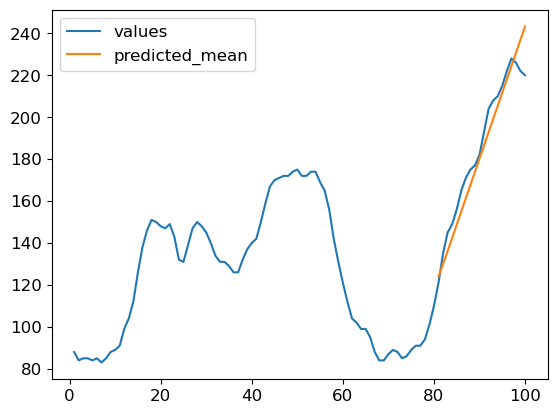

In [85]:
pred2 = model2.predict(start=81, end=100, dynamic=False).to_frame()

ax = data.plot()

pred2.plot(ax=ax)

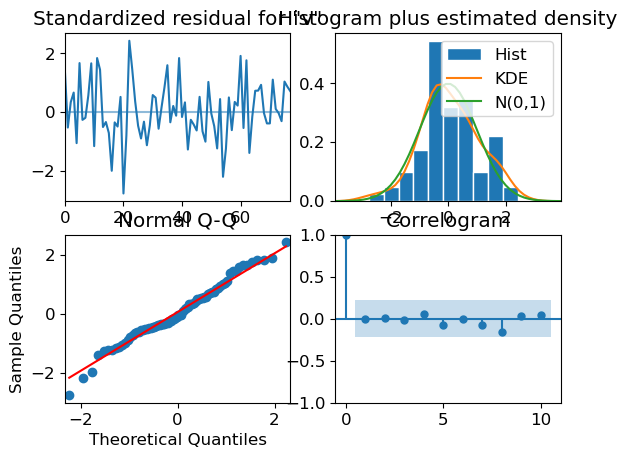

In [86]:
model2.plot_diagnostics();

In [87]:
mse, rmse, mad, mape = evaluate_forecasts(data_test, pred2)
results = pd.DataFrame([mse, rmse, mad, mape]).T
results.columns = ["mse", "rmse", "mad", "mape"]
results

,mse,rmse,mad,mape
0,77.953997,77.953997,7.361976,0.039742


**2. Analizar el efecto de normalizar la serie de tiempo, es decir usar MinMaxScaler para normalizar los datos. Posterior a esto, realizar el mismo precedimiento realizado en clase y encontrar el mejor modelo de ARIMA. Justifique todos los análisis realizados, incluyendo los resultados de las gráficas de ACF y PAC.**

In [88]:
# Normalizar - listo
scaler = MinMaxScaler()
scaler.fit(data)
data_norm = scaler.transform(data)
data_norm = pd.DataFrame(data_norm, columns=["data"])
data_norm

,data
0,0.034483
1,0.006897
2,0.013793
3,0.013793
4,0.006897
...,...
95,0.958621
96,1.000000
97,0.986207
98,0.958621


<Axes: >

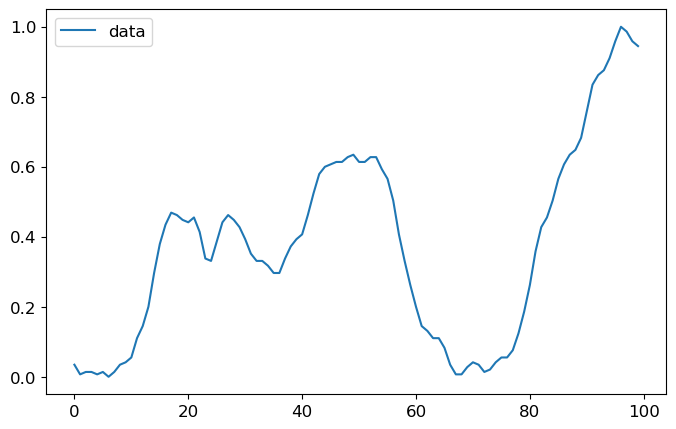

In [89]:
data_norm.plot(figsize=(8,5))

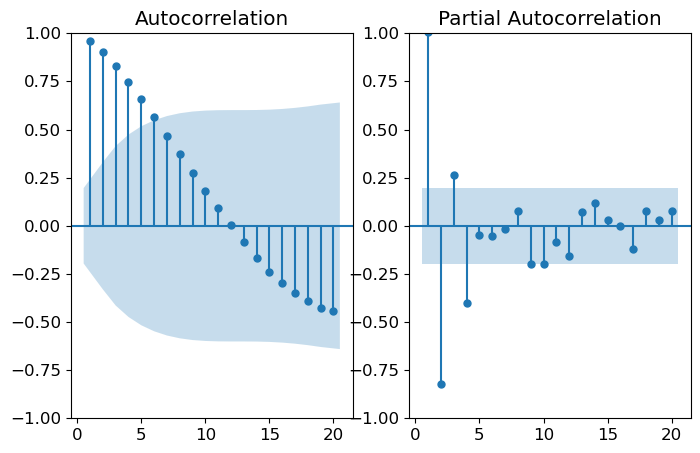

In [90]:
# No cambia mucho a los que están sin normalizar (originales)
plot_acf_pacf(data_norm)

In [91]:
# La diferenciamos
diff1_norm = data_norm.diff().dropna()

print('ADF para derivada primer orden...\n')
adf_test(diff1_norm)

diff2_norm = data_norm.diff().diff().dropna()

print('\n ADF para derivada segundo orden...\n')
adf_test(diff2_norm)

ADF para derivada primer orden...

Results of Dickey-Fuller Test:
Test Statistic                 -2.722238
p-value                         0.070268
#Lags Used                      2.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64
Non-stationary

 ADF para derivada segundo orden...

Results of Dickey-Fuller Test:
Test Statistic                -9.929762e+00
p-value                        2.843429e-17
#Lags Used                     1.000000e+00
Number of Observations Used    9.600000e+01
Critical Value (1%)           -3.500379e+00
Critical Value (5%)           -2.892152e+00
Critical Value (10%)          -2.583100e+00
dtype: float64
Stationary


In [92]:
ilustracion_norm = pd.DataFrame()

ilustracion_norm['real'] = data_norm
ilustracion_norm['1d'] = data_norm.diff()
ilustracion_norm['p=2'] = data_norm.diff(periods=2)
ilustracion_norm['2d'] = data_norm.diff().diff()
ilustracion_norm

,real,1d,p=2,2d
0,0.034483,NaN,NaN,NaN
1,0.006897,-0.027586,NaN,NaN
2,0.013793,0.006897,-0.020690,0.034483
3,0.013793,0.000000,0.006897,-0.006897
4,0.006897,-0.006897,-0.006897,-0.006897
...,...,...,...,...
95,0.958621,0.048276,0.082759,0.013793
96,1.000000,0.041379,0.089655,-0.006897
97,0.986207,-0.013793,0.027586,-0.055172
98,0.958621,-0.027586,-0.041379,-0.013793


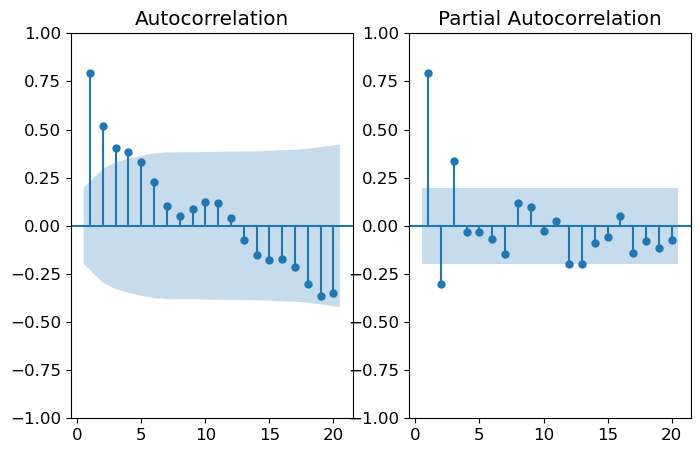

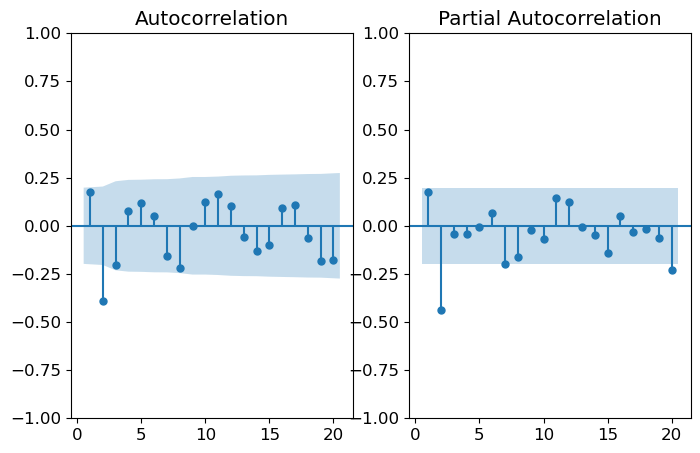

In [93]:
plot_acf_pacf(diff1_norm)
plot_acf_pacf(diff2_norm)

In [94]:
train_data_norm, test_data_norm = split_dataset(data_norm)

In [95]:
arima_model_norm1 = ARIMA(train_data_norm, order=(3, 1, 3))
model_norm1 = arima_model_norm1.fit()
print(model_norm1.summary())

                               SARIMAX Results                                
Dep. Variable:                   data   No. Observations:                   80
Model:                 ARIMA(3, 1, 3)   Log Likelihood                 190.954
Date:                Tue, 06 Feb 2024   AIC                           -367.908
Time:                        18:51:47   BIC                           -351.322
Sample:                             0   HQIC                          -361.263
                                 - 80                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0350      1.027      1.007      0.314      -0.979       3.049
ar.L2         -0.5517      1.396     -0.395      0.693      -3.288       2.185
ar.L3          0.2749      0.574      0.479      0.6

                               SARIMAX Results                                
Dep. Variable:                   data   No. Observations:                   80
Model:             ARIMA([2], 2, [2])   Log Likelihood                 183.267
Date:                Tue, 06 Feb 2024   AIC                           -360.535
Time:                        18:51:47   BIC                           -353.464
Sample:                             0   HQIC                          -357.704
                                 - 80                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L2         -0.1574      0.299     -0.526      0.599      -0.744       0.429
ma.L2         -0.2145      0.299     -0.719      0.472      -0.800       0.371
sigma2         0.0005    9.6e-05      5.531      0.0

<Figure size 700x700 with 0 Axes>

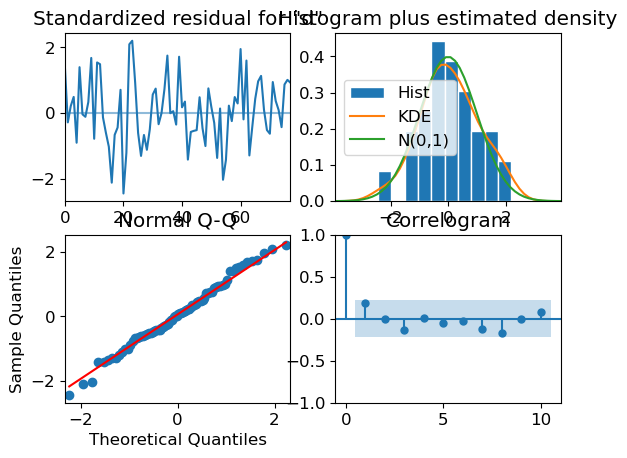

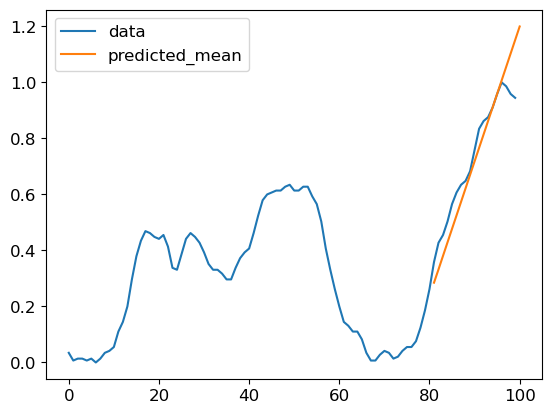

In [96]:

model_norm_f2 = model_forecast(train_data_norm, data_norm, (0,1),2,(0,1), start=81, end=100)


In [97]:
mse, rmse, mad, mape = evaluate_forecasts(test_data_norm, model_norm_f2)
results = pd.DataFrame([mse, rmse, mad, mape]).T
results.columns = ["mse", "rmse", "mad", "mape"]
results

,mse,rmse,mad,mape
0,0.00673,0.00673,0.053548,0.071644


**3. Investigar la implementación y teoría de los modelos SARIMAX. Además de eso, generar un modelo de pronóstico usando SARIMAX, donde todo el procediemiento anteriormente descrito es implementado, para el siguiente conjunto de datos con estacionalidad:
air2 = requests.get('https://www.stata-press.com/data/r12/air2.dta').content
data2 = pd.read_stata(BytesIO(air2))
data2.index = pd.date_range(start=datetime(data2.time[0], 1, 1), periods=len(data2), freq='MS')**

In [98]:
air2 = requests.get("https://www.stata-press.com/data/r12/air2.dta").content 
data2 = pd.read_stata(BytesIO(air2)) 
data2

,air,time,t
0,112,1949.000000,1.0
1,118,1949.083374,2.0
2,132,1949.166626,3.0
3,129,1949.250000,4.0
4,121,1949.333374,5.0
...,...,...,...
139,606,1960.583374,140.0
140,508,1960.666626,141.0
141,461,1960.750000,142.0
142,390,1960.833374,143.0


In [99]:
data2['time'] = pd.to_datetime(data2['time'])
data2.index = pd.date_range(start=datetime(data2['time'][0].year, 1, 1), periods=len(data2), freq='MS')


In [100]:
data2

,air,time,t
1970-01-01,112,1970-01-01 00:00:00.000001949,1.0
1970-02-01,118,1970-01-01 00:00:00.000001949,2.0
1970-03-01,132,1970-01-01 00:00:00.000001949,3.0
1970-04-01,129,1970-01-01 00:00:00.000001949,4.0
1970-05-01,121,1970-01-01 00:00:00.000001949,5.0
...,...,...,...
1981-08-01,606,1970-01-01 00:00:00.000001960,140.0
1981-09-01,508,1970-01-01 00:00:00.000001960,141.0
1981-10-01,461,1970-01-01 00:00:00.000001960,142.0
1981-11-01,390,1970-01-01 00:00:00.000001960,143.0


In [101]:
data2 = data2.drop(columns=["time", "t"])
data2

,air
1970-01-01,112
1970-02-01,118
1970-03-01,132
1970-04-01,129
1970-05-01,121
...,...
1981-08-01,606
1981-09-01,508
1981-10-01,461
1981-11-01,390


<Axes: >

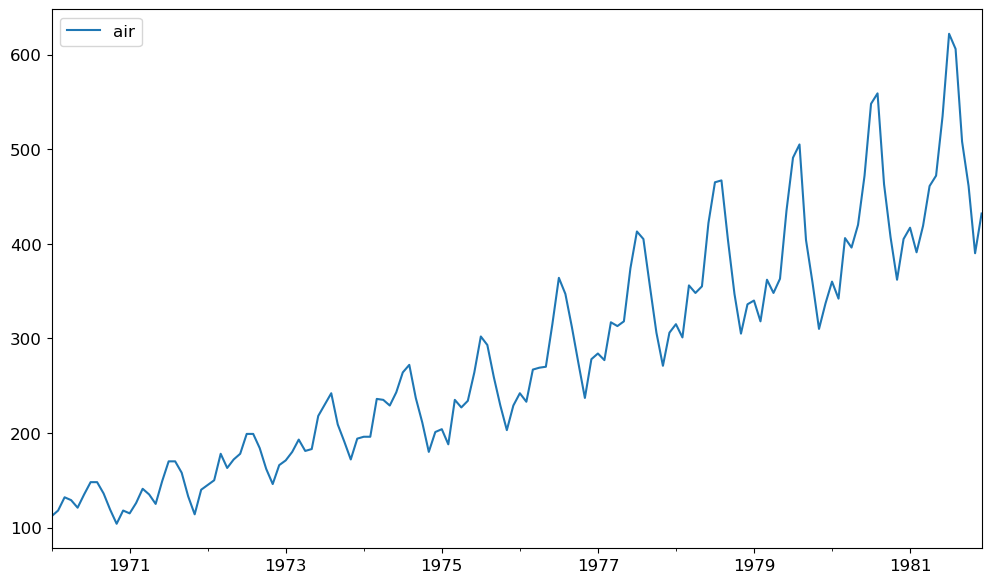

In [102]:
data2.plot(figsize=(12,7))

In [103]:
from statsmodels.tsa.seasonal import seasonal_decompose

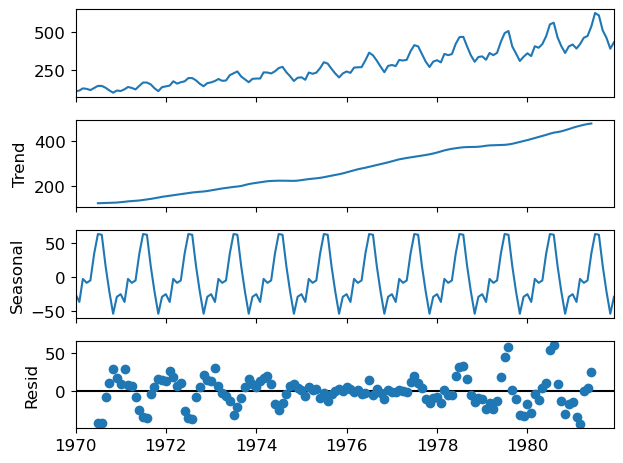

In [104]:
# Si se cuenta con estacionalidad
decompose = seasonal_decompose(data2, model="additive", period=12)
decompose.plot();

<Axes: >

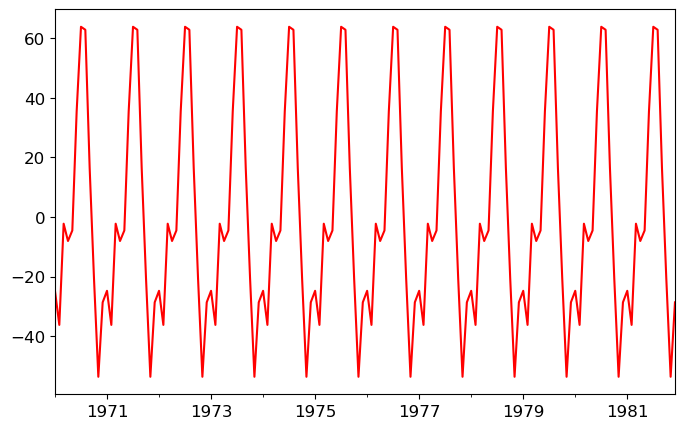

In [105]:
seasonality= decompose.seasonal
seasonality.plot(color='red', figsize=(8,5))

In [106]:
adf_test(data2)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64
Non-stationary


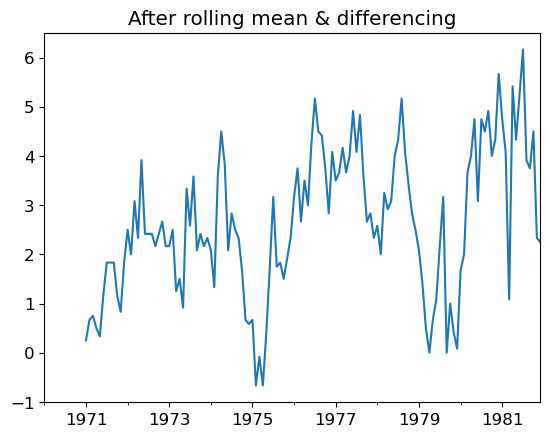

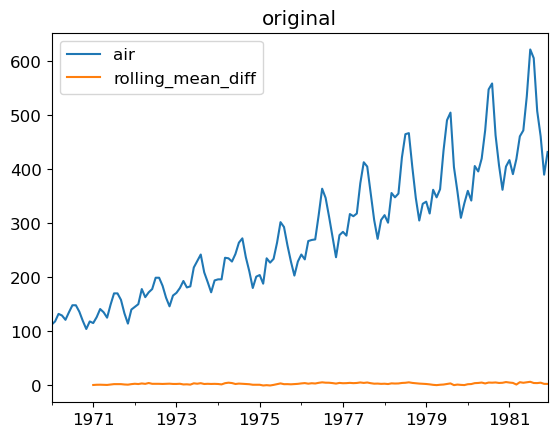

In [107]:
rolling_mean = data2.rolling(window = 12).mean()
data2['rolling_mean_diff'] = rolling_mean - rolling_mean.shift()
ax1 = plt.subplot()
data2['rolling_mean_diff'].plot(title='After rolling mean & differencing');
ax2 = plt.subplot()
data2.plot(title='original');

In [108]:
train_data2, test_data2 = split_dataset(data2)

In [109]:
adf_test(data2["rolling_mean_diff"].dropna())

Results of Dickey-Fuller Test:
Test Statistic                  -3.383021
p-value                          0.011551
#Lags Used                       1.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64
Stationary


In [110]:
arima_model_ej3= ARIMA(train_data2["air"], order=(3, 1, 3))
model_ej3 = arima_model_ej3.fit()
print(model_ej3.summary())

                               SARIMAX Results                                
Dep. Variable:                    air   No. Observations:                  115
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -507.430
Date:                Tue, 06 Feb 2024   AIC                           1028.861
Time:                        18:51:50   BIC                           1048.014
Sample:                    01-01-1970   HQIC                          1036.634
                         - 07-01-1979                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9585      0.095     10.077      0.000       0.772       1.145
ar.L2          0.2874      0.140      2.048      0.041       0.012       0.562
ar.L3         -0.6639      0.091     -7.306      0.0

<Axes: >

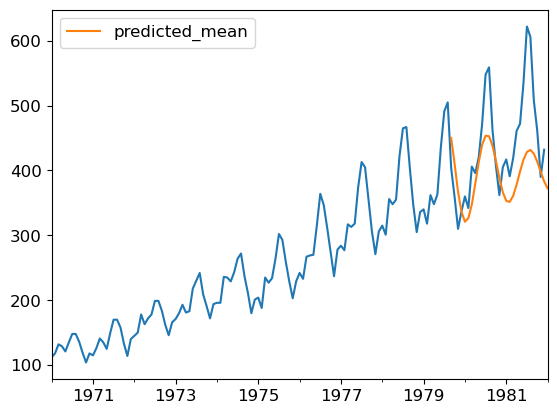

In [111]:
pred_3 = model_ej3.predict(start= 116, end=144, dynamic=False).to_frame()

ax = data2['air'].plot()

pred_3.plot(ax=ax)

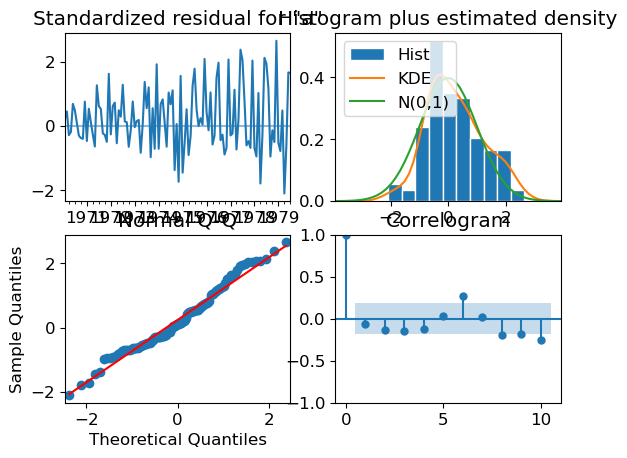

In [112]:
model_ej3.plot_diagnostics();

In [113]:
mse, rmse, mad, mape = evaluate_forecasts(test_data2["air"], pred_3)
result = pd.DataFrame([mse, rmse, mad, mape]).T
result.columns = ["mse", "rmse", "mad", "mape"]
result

,mse,rmse,mad,mape
0,5041.224234,5041.224234,52.59828,0.107745


In [114]:
sarimax = sm.tsa.statespace.SARIMAX(train_data2['air'], order=(1, 1, 1), seasonal_order=(1,1,1,20))
sar = sarimax.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.19865D+00    |proj g|=  6.47982D-02

At iterate    5    f=  4.17044D+00    |proj g|=  6.84524D-02


 This problem is unconstrained.



At iterate   10    f=  4.16148D+00    |proj g|=  3.73120D-03

At iterate   15    f=  4.01615D+00    |proj g|=  1.70488D-02

At iterate   20    f=  3.91539D+00    |proj g|=  1.53731D-02

At iterate   25    f=  3.91453D+00    |proj g|=  1.47720D-03

At iterate   30    f=  3.90798D+00    |proj g|=  2.96203D-02

At iterate   35    f=  3.90529D+00    |proj g|=  9.88491D-05

At iterate   40    f=  3.90529D+00    |proj g|=  7.49321D-04

At iterate   45    f=  3.90528D+00    |proj g|=  1.47661D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     47     64      1     0     0   7.127D-06   3.905D+00
  F =   3.90528173098

<Axes: >

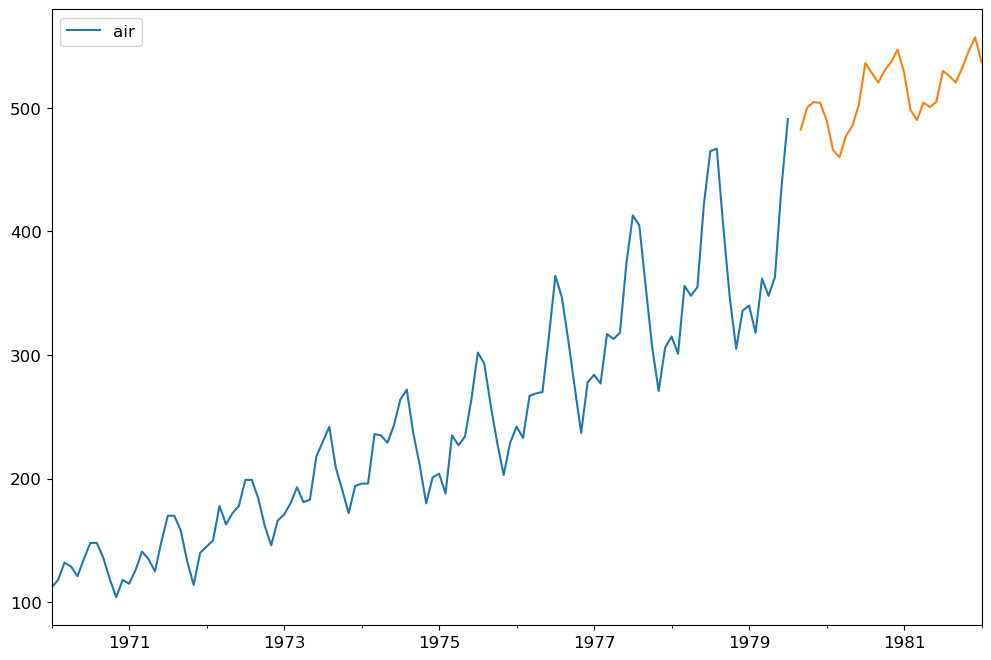

In [115]:
pred_sar = sar.predict(start=116,end=144)
train_data2[['air']].plot(figsize=(12,8))
pred_sar.plot()

In [116]:
mse, rmse, mad, mape = evaluate_forecasts(test_data2["air"], pred_sar)
result = pd.DataFrame([mse, rmse, mad, mape]).T
result.columns = ["mse", "rmse", "mad", "mape"]
result

,mse,rmse,mad,mape
0,10483.588576,10483.588576,90.160099,0.225783


**4. Realizar una predicción de 20 unidades de tiempo en el futuro, tanto para el modelo ARIMA como SARIMA y reportar los resulados en una gráfica donde se puedan observar los datos reales y los datos predichos**

                               SARIMAX Results                                
Dep. Variable:                 values   No. Observations:                   80
Model:             ARIMA([2], 2, [2])   Log Likelihood                -204.918
Date:                Tue, 06 Feb 2024   AIC                            415.836
Time:                        18:51:52   BIC                            422.906
Sample:                             0   HQIC                           418.666
                                 - 80                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L2         -0.1580      0.299     -0.528      0.598      -0.744       0.428
ma.L2         -0.2139      0.299     -0.716      0.474      -0.799       0.372
sigma2        11.1660      2.019      5.531      0.0

<Figure size 700x700 with 0 Axes>

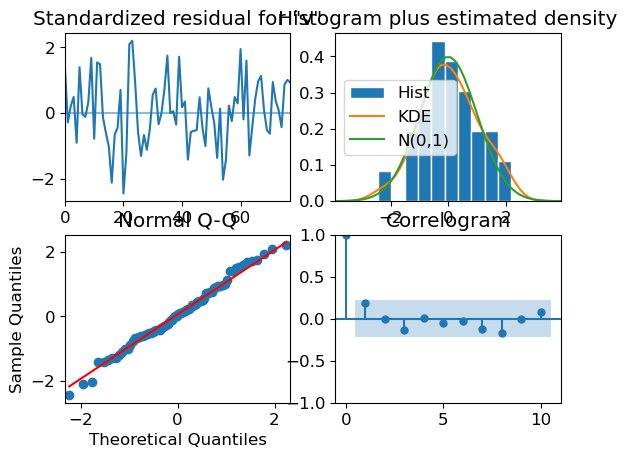

,predicted_mean
81,124.312021
82,131.192973
83,138.228423
84,145.230070
85,152.207314
86,159.189897
87,166.176335
88,173.161929
89,180.146914
90,187.132033


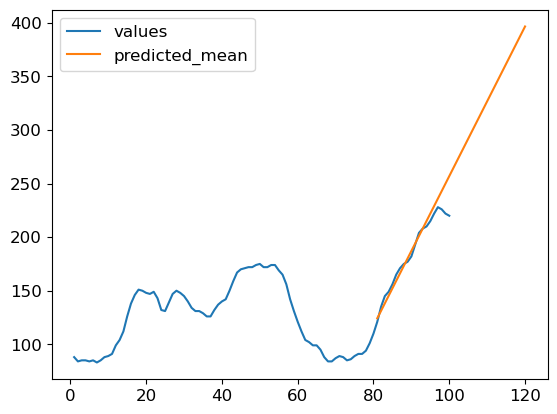

In [117]:
model_forecast(data_train, data, (0,1),2,(0,1), start=81, end=100 + 20)

In [118]:
from pandas.tseries.offsets import DateOffset
pred_date=[data2.index[-1]+ DateOffset(months=x)for x in range(0,12)]

In [119]:
pred_date = pd.DataFrame(index=pred_date[1:],columns=data2.columns)
pred_date.head()


,air,rolling_mean_diff
1982-01-01,NaN,NaN
1982-02-01,NaN,NaN
1982-03-01,NaN,NaN
1982-04-01,NaN,NaN
1982-05-01,NaN,NaN


In [120]:
data3=pd.concat([data2,pred_date])
data3.head()

,air,rolling_mean_diff
1970-01-01,112,NaN
1970-02-01,118,NaN
1970-03-01,132,NaN
1970-04-01,129,NaN
1970-05-01,121,NaN


In [121]:
data3['forecast'] = r.predict(start=116,end=164, dynamic= True)
data3[['air', 'forecast']].plot(figsize=(8, 5))

NameError: name 'r' is not defined